In [0]:
import torch
import random
import numpy as np

In [0]:
n_seed = 2
random.seed(n_seed)
np.random.seed(n_seed)
torch.manual_seed(n_seed)
torch.cuda.manual_seed(n_seed)

In [0]:
torch.backends.cudnn.deterministic = True

In [0]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [23]:
x_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
x_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
x_train = x_train.float()
x_test = x_test.float()

In [0]:
x_train = x_train.reshape([-1, 28 * 28])
x_test = x_test.reshape([-1, 28 * 28])

In [0]:
class MnistNet(torch.nn.Module):
  def __init__(self, n_hid_neurons):
    super(MnistNet, self).__init__()
    self.fc1 = torch.nn.Linear(28 * 28, n_hid_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hid_neurons, 10)     # predict for 10 classes

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

In [0]:
mnist_net = MnistNet(100)

In [76]:
!nvidia-smi

Wed Dec 11 13:13:19 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.36       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    31W / 250W |    797MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)

In [0]:
loss = torch.nn.CrossEntropyLoss()

In [0]:
# optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-3)
# optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-3, momentum=0.9)
# optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-3, momentum=0.9, nesterov=True)
# optimizer = torch.optim.Rprop(mnist_net.parameters())
# optimizer = torch.optim.RMSprop(mnist_net.parameters())
optimizer = torch.optim.Adam(mnist_net.parameters())

In [0]:
import time

In [0]:
test_accuracy_1 = []
test_accuracy_2 = []
test_accuracy_3 = []

In [95]:
len(test_accuracy_3)

0

In [0]:
batch_size = 100

# test_loss_valid = []
# test_loss_train = []

x_test = x_test.to(device)
y_test = y_test.to(device)

# start = time.time()
for epoch in range(300):
  order = np.random.permutation(len(x_train))

  for start_index in range(0, len(x_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    x_batch = x_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    preds = mnist_net.forward(x_batch)

    loss_value = loss(preds, y_batch)
    loss_value.backward()

    optimizer.step()

  test_preds = mnist_net.forward(x_test)
  # test_loss_valid.append(loss(test_preds, y_test))
  # test_loss_train.append(loss_value)

  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
  test_accuracy_3.append(accuracy)

  print(epoch, accuracy)

  # if epoch % 100 == 0:
  #   print((time.time() - start) / 1e6)


In [0]:
acc_tmp = (np.asarray(test_accuracy_1) + np.asarray(test_accuracy_2) + np.asarray(test_accuracy_3)) / 3

In [0]:
acc_adam = acc_tmp

In [0]:
import matplotlib.pyplot as plt

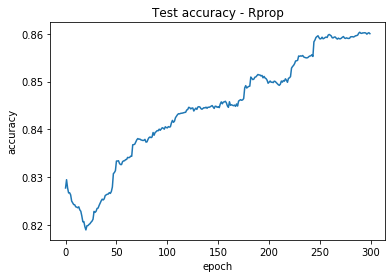

In [50]:
acc_r_prop;
plt.plot(acc_r_prop)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Test accuracy - Rprop");

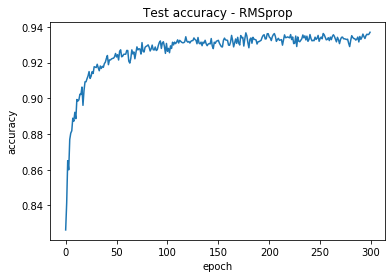

In [75]:
acc_rms_prop;
plt.plot(acc_rms_prop)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Test accuracy - RMSprop");

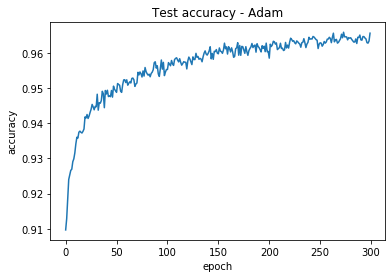

In [105]:
acc_adam;
plt.plot(acc_adam)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Test accuracy - Adam");

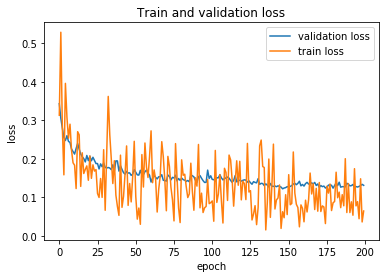

In [35]:
plt.plot(test_loss_valid)
plt.plot(test_loss_train)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Train and validation loss")
plt.legend(['validation loss', 'train loss']);

100 epoch on **GPU**: 0.0001250686707496643

100 epoch on **CPU**: 0.00020344500136375428

100 epoch, batch_size = 100, cudnn.deterministic = **True**: 0.00013575996232032775

100 epoch, batch_size = 100, cudnn.deterministic = **False**: 0.00013668710923194885